# <center>Projet Nº 4 - Analyse des ventes de l'entreprise "Rester Livres"</center>


## <center>Mission 1: Nettoyage des données</center>

***Mission 1*** - **On va vérifier s'il y a des valeurs manquantes et des valeurs aberrantes.**

*Il y a 3 fichiers :*
- **Les ventes (appelées “Transactions”)**
- **La liste des clients**
- **La liste des produits**

In [1]:
library(ggplot2)
library(ineq)
library("dplyr")
library('ggthemes')
library('scales') 
library(lubridate)
library(gmodels)
library(corrplot)
library(ggcorrplot)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'gmodels' was built under R version 3.6.3"corrplot 0.90 loaded


[1] "#####################################################################################################"
[1] "Table Produits"


id_prod,price,categ
0_1421,19.99,0
0_1368,5.13,0


[1] "Table clients"


client_id,sex,birth
c_4410,f,1967
c_7839,f,1975


[1] "Table transaction"


id_prod,date,session_id,client_id
0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
2_226,2022-02-03 01:55:53.276402,s_159142,c_277


[1] "#####################################################################################################"
[1] "Traitement table produit"


[1] 3287    3

    id_prod         price            categ       
 0_0    :   1   Min.   : -1.00   Min.   :0.0000  
 0_1    :   1   1st Qu.:  6.99   1st Qu.:0.0000  
 0_10   :   1   Median : 13.06   Median :0.0000  
 0_100  :   1   Mean   : 21.86   Mean   :0.3702  
 0_1000 :   1   3rd Qu.: 22.99   3rd Qu.:1.0000  
 0_1001 :   1   Max.   :300.00   Max.   :2.0000  
 (Other):3281                                    

'data.frame':	3287 obs. of  3 variables:
 $ id_prod: Factor w/ 3287 levels "0_0","0_1","0_10",..: 472 412 2012 2851 567 185 2714 1289 1020 1631 ...
 $ price  : num  19.99 5.13 17.99 4.99 3.99 ...
 $ categ  : int  0 0 0 1 0 0 1 0 0 0 ...


id_prod   price   categ 
      0       0       0

[1] 0

[1] "#####################################################################################################"
[1] "Traitement table clients"


[1] 8623    3

   client_id    sex          birth     
 c_1    :   1   f:4491   Min.   :1929  
 c_10   :   1   m:4132   1st Qu.:1966  
 c_100  :   1            Median :1979  
 c_1000 :   1            Mean   :1978  
 c_1001 :   1            3rd Qu.:1992  
 c_1002 :   1            Max.   :2004  
 (Other):8617                          

'data.frame':	8623 obs. of  3 variables:
 $ client_id: Factor w/ 8623 levels "c_1","c_10","c_100",..: 3792 7600 778 5514 4803 3502 2057 669 6053 6519 ...
 $ sex      : Factor w/ 2 levels "f","m": 1 1 1 1 2 2 1 1 2 2 ...
 $ birth    : int  1967 1975 1984 1962 1943 1993 1967 1978 1971 1993 ...


client_id       sex     birth 
        0         0         0

[1] 0

[1] "#####################################################################################################"
[1] "Traitement table transaction"


[1] 337016      4

    id_prod                                    date           session_id    
 1_369  :  1081   test_2021-03-01 02:30:02.237413:    13   s_0     :   200  
 1_417  :  1062   test_2021-03-01 02:30:02.237414:     8   s_118668:    14  
 1_498  :  1036   test_2021-03-01 02:30:02.237427:     8   s_21005 :    13  
 1_414  :  1027   test_2021-03-01 02:30:02.237428:     8   s_96857 :    13  
 1_425  :  1013   test_2021-03-01 02:30:02.237443:     8   s_168560:    12  
 1_398  :   952   test_2021-03-01 02:30:02.237444:     8   s_93892 :    12  
 (Other):330845   (Other)                        :336963   (Other) :336752  
   client_id     
 c_1609 : 12855  
 c_6714 :  4473  
 c_3454 :  3275  
 c_4958 :  2562  
 c_2140 :   195  
 c_7959 :   195  
 (Other):313461  

'data.frame':	337016 obs. of  4 variables:
 $ id_prod   : Factor w/ 3266 levels "0_0","0_1","0_10",..: 534 3172 2598 1310 388 94 562 692 518 501 ...
 $ date      : Factor w/ 336855 levels "2021-03-01 00:01:07.843138",..: 37712 309386 186437 206818 125782 176934 160054 181843 309600 333953 ...
 $ session_id: Factor w/ 169195 levels "s_0","s_1","s_10",..: 79253 62825 163191 5109 129138 158579 149648 160973 62947 76109 ...
 $ client_id : Factor w/ 8602 levels "c_1","c_10","c_100",..: 3826 1966 3629 3988 271 1697 5321 471 1343 4916 ...


id_prod       date session_id  client_id 
         0          0          0          0

[1] 126

[1] 10.32

[1] 22.99

[1] 101.99

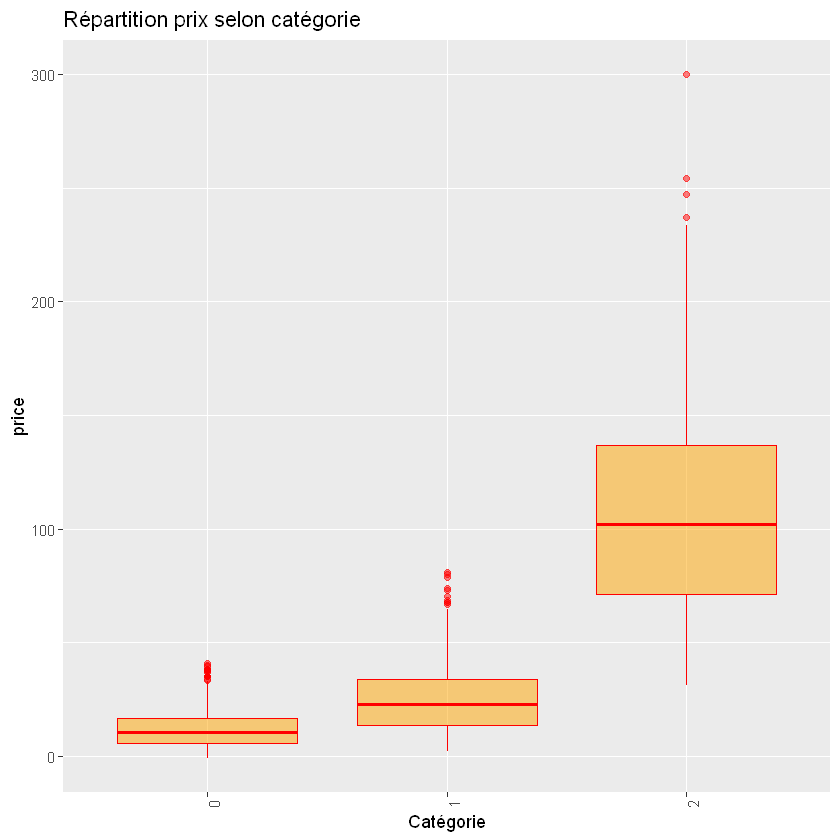

In [2]:
# Chargement des données
product <- read.csv("./data/products.csv")
client <- read.csv('./data/customers.csv')
transaction <- read.csv('./data/transactions.csv')


print('#####################################################################################################')
# On va afficher les 2 prèmieres lignes des chaque fichier
print('Table Produits')
head(product, 2)
print('Table clients')
head(client, 2)
print('Table transaction')
head(transaction, 2)

print('#####################################################################################################')
# Traitement table product
print('Traitement table produit')
# On va afficher la dimention du dataframe produit
dim(product) 
# on va regarder les descriptifs du fichier produit
summary(product) 

str(product)
# On vérifie s'il y a des valeurs manquantes
colSums(is.na(product))
# Il n'y a pas des valeurs manquantes dans la table produit

# On vérifie s'il y a des doublons
sum(duplicated(product)) 
# Il n'y a pas des doublons dans la table produit

# Visualisation des prix avec ggplot
product %>% select(categ, price) %>% ggplot(aes(factor(categ), price)) +
                geom_boxplot(color="red", fill="orange", alpha=0.5) +
                ggtitle("Répartition prix selon catégorie") +
                theme(axis.text.x = element_text(angle = 90, hjust =1)) + xlab('Catégorie') 

# On observe un prix moyen de 21.86 avec un prix maximum de 300 euros
# On peut considerer des valeurs aberrantes dans les prix qui vont jusq'à 300 euros
# On a également observé un prix negatif (-1)
# On va supprimer le prix négatif
product <- product[!(product$price == -1),]


print('#####################################################################################################')
# Traitement table client
print('Traitement table clients')
# On va afficher la dimension du dataframe produit
dim(client) 
# on va regarder les descriptifs du fichier produit
summary(client)

str(client)
# On verifie s'il y a des valeurs manquantes
colSums(is.na(client)) 
# Il n'y a pas des valeurs manquantes dans la table client

# On verifie s'il y a des doublons
sum(duplicated(client))
# Il n'y a pas des doublons dans la table client

# On va éliminer ct_0 et ct_1 présents dans la table client qui correspondent à des tests
client <- client[!(client$client_id=="ct_0" | client$client_id=="ct_1"),]

print('#####################################################################################################')
# Traitement table client
print('Traitement table transaction')
# On va afficher la dimension du dataframe produit
dim(transaction)
# on va regarder les descriptifs du fichier produit
summary(transaction)

str(transaction)
# On verifie s'il y a des valeurs manquantes
colSums(is.na(transaction)) 
# Il  n'y a pas des valeurs manquantes dans la table transaction

# On verifie s'il y a des doublons
sum(duplicated(transaction))
# Il y a 126 doublons pour la table transaction qui correspondent à des tests
# qui ont été faits tous à la même date '2021-03-01' et ils ont la même session_id (s_0) et client_id (ct_0 et ct_1)

# On va éliminer les doublons 'T_0' 
transaction <- transaction[!(transaction$id_prod=="T_0"),]

# On va supprimer le valeur 0_2245 de la table transaction (ce n'est pas présente dans la table produit )
transaction <- transaction[!(transaction$id_prod == '0_2245'),]

####################################################################################################################

## On va éliminer les outliers par la mediane

product0 <- product[product['categ'] == 0,] # On sélectionne la catégorie 0
median(product0$price) # On calcule la mediane de la catégorie 0

product1 <- product[product['categ'] == 1,] # On sélectionne la catégorie 1
median(product1$price) # On calcule la mediane de la catégorie 1

product2 <- product[product['categ'] == 2,] # On sélectionne la catégorie 2
median(product2$price) # On calcule la mediane de la catégorie 2

# On va selectionner la catégorie 0 et ses prix
product0 <- product[(product['categ'] == 0) & (product['price'] <= 10.32),]

# On va selectionner la catégorie 1 et ses prix
product1 <- product[(product['categ'] == 1) & (product['price'] <= 22.99),]

# On va selectionner la catégorie 2 et ses prix
product2 <- product[(product['categ'] == 2) & (product['price'] <= 101.99),]

## On fait la jointure

produit <- merge(product0, product1, all = TRUE)
produit <- merge(produit, product2, all = TRUE)

## <center>Mission 2: Analyses des données</center>

- **Des indicateurs de tendance centrale et de dispersion.**
- **Une analyse de concentration, via une courbe de Lorenz et un indice de Gini.**
- **Des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates).**
- **Des analyses bivariées.**

L'âge moyen est de : 44 ans

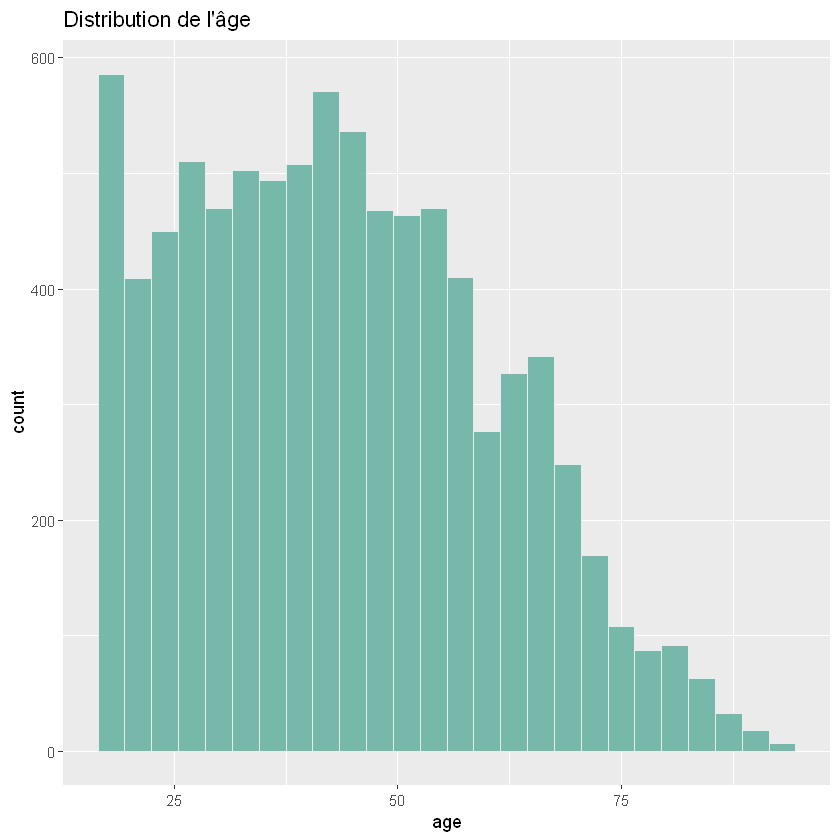

Warning message:
"Ignoring unknown parameters: shape"

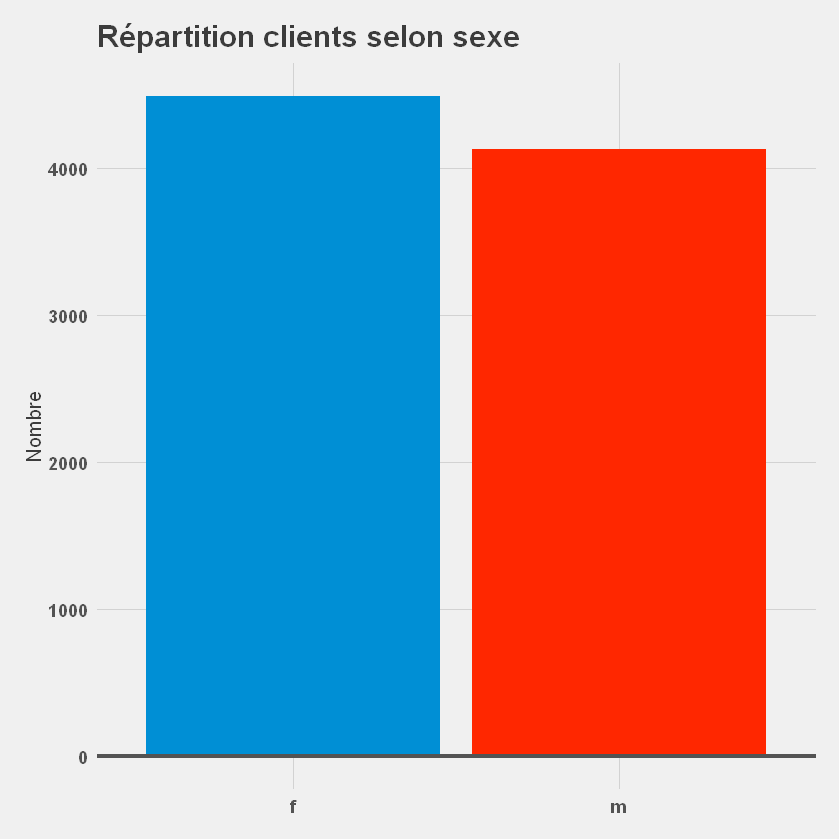

L'indice de Gini est : 0.2207726[1] ""


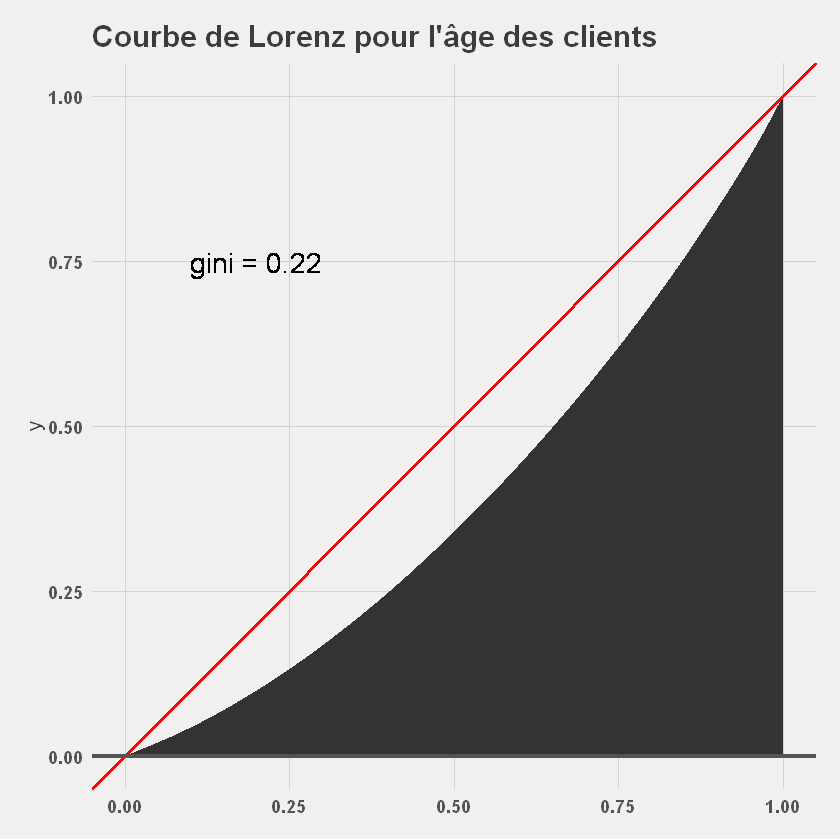

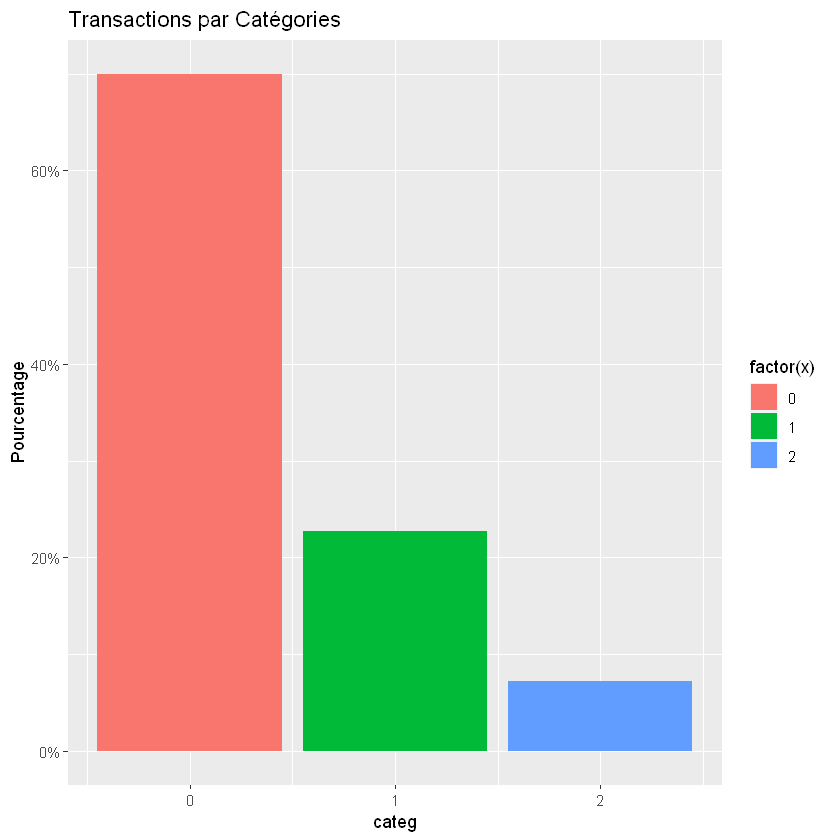

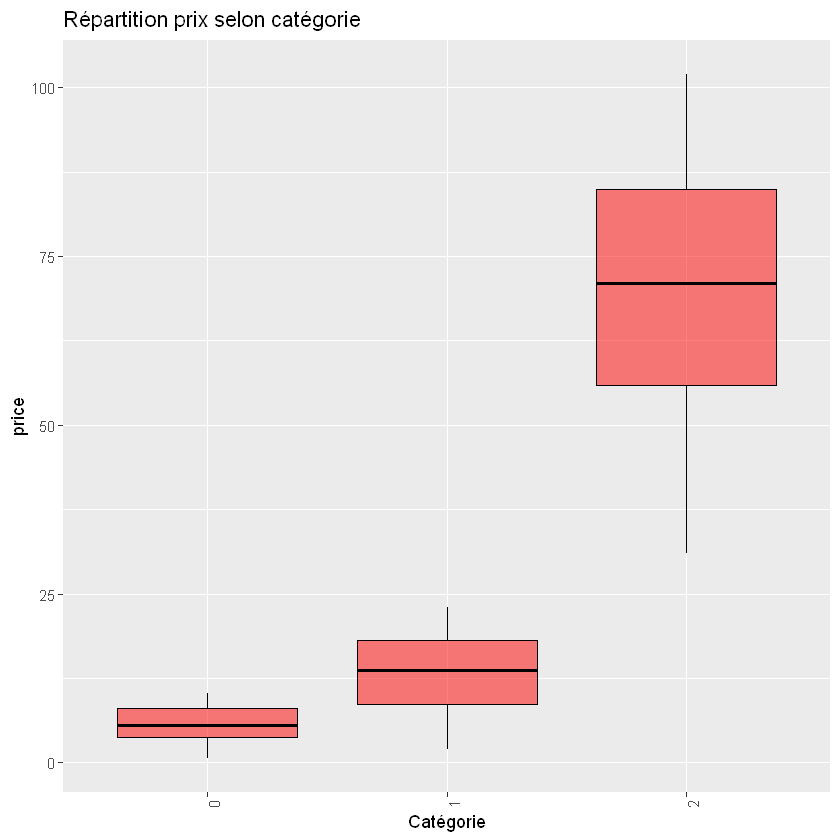

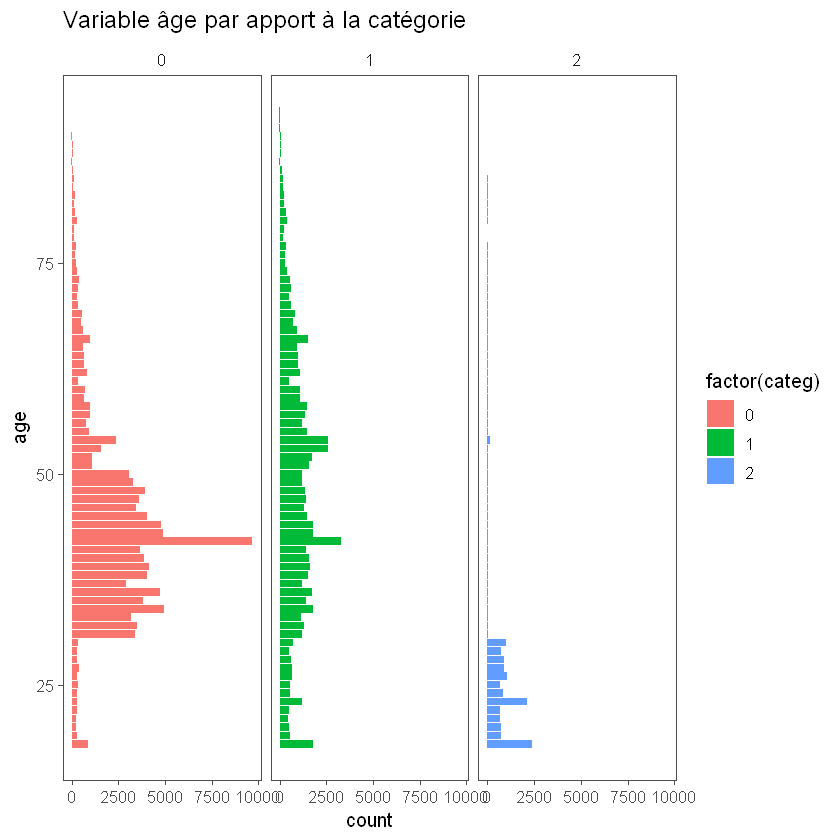

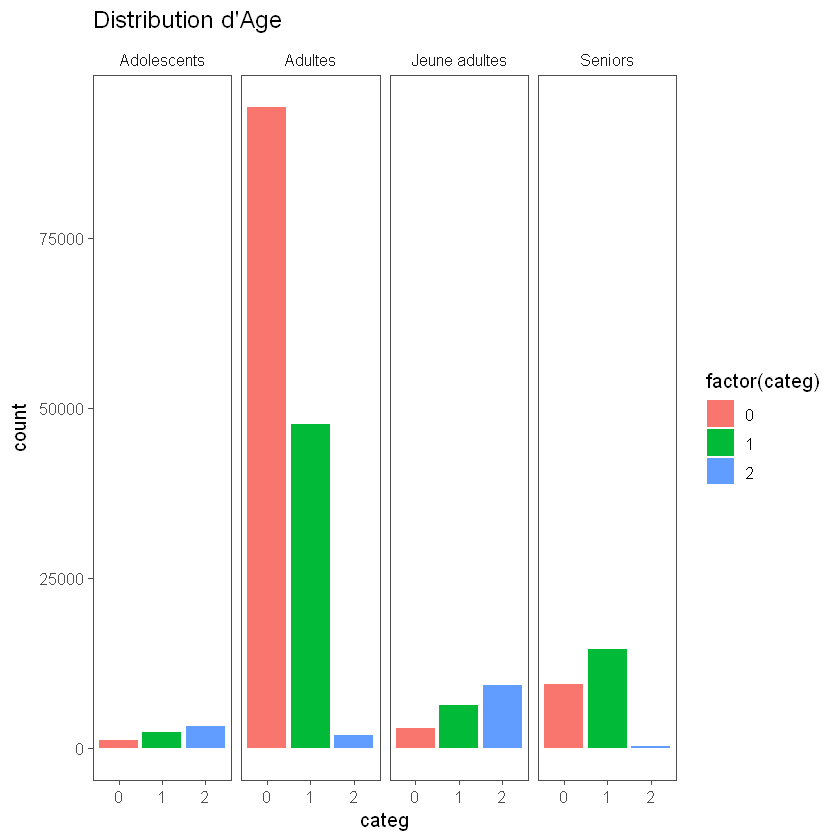

Le Chiffre d'Affaires de Rester livres est de : 2.73 Millions d'Euros (€)[1] "----------"
Le Chiffre d'Affaires mensuel de Rester livres est de : 227348.6 Euros (€)

`summarise()` has grouped output by 'categ'. You can override using the `.groups` argument.


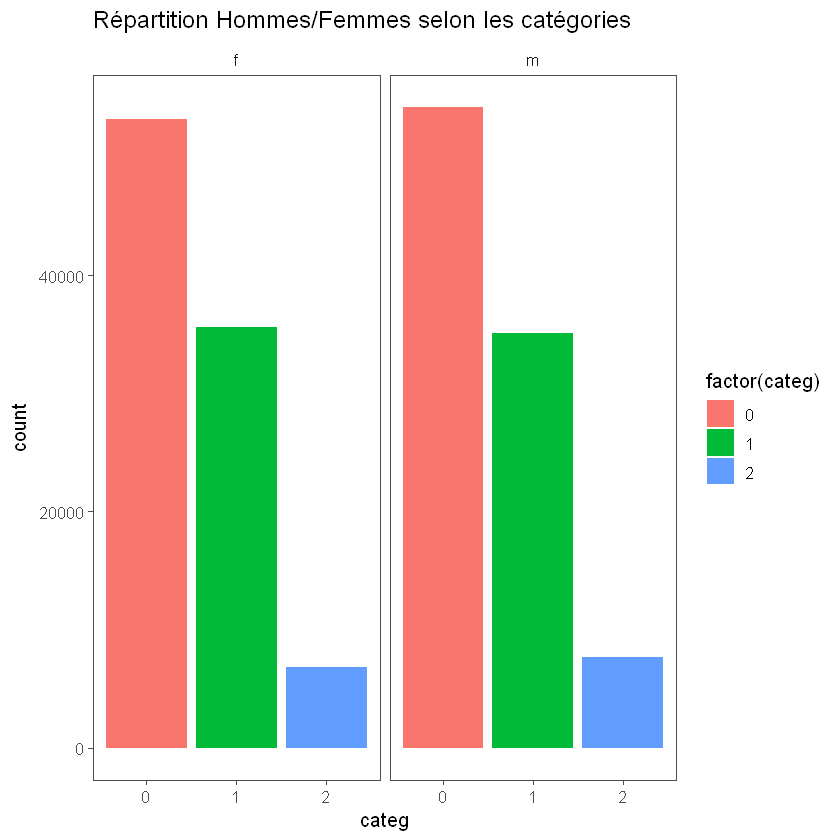

,mean,sd,median
0,5.684719,2.583203,5.590
1,13.424933,5.716752,13.650
2,70.119917,18.575822,71.065


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


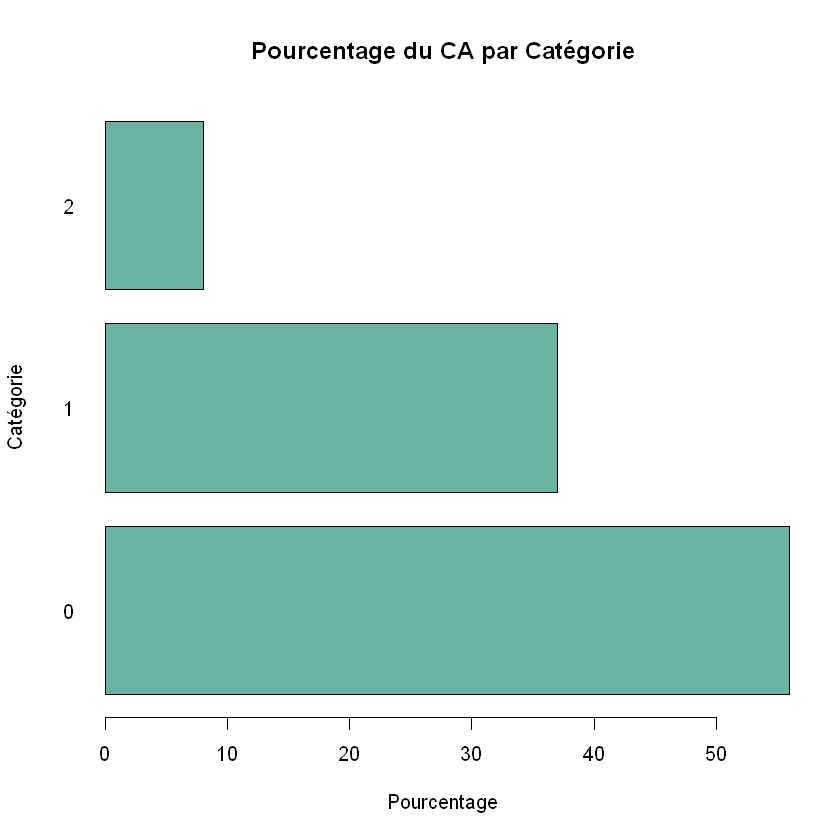

Le prix moyen est de : 14.15[1] ""
L'ecart type est de : 14.44

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."

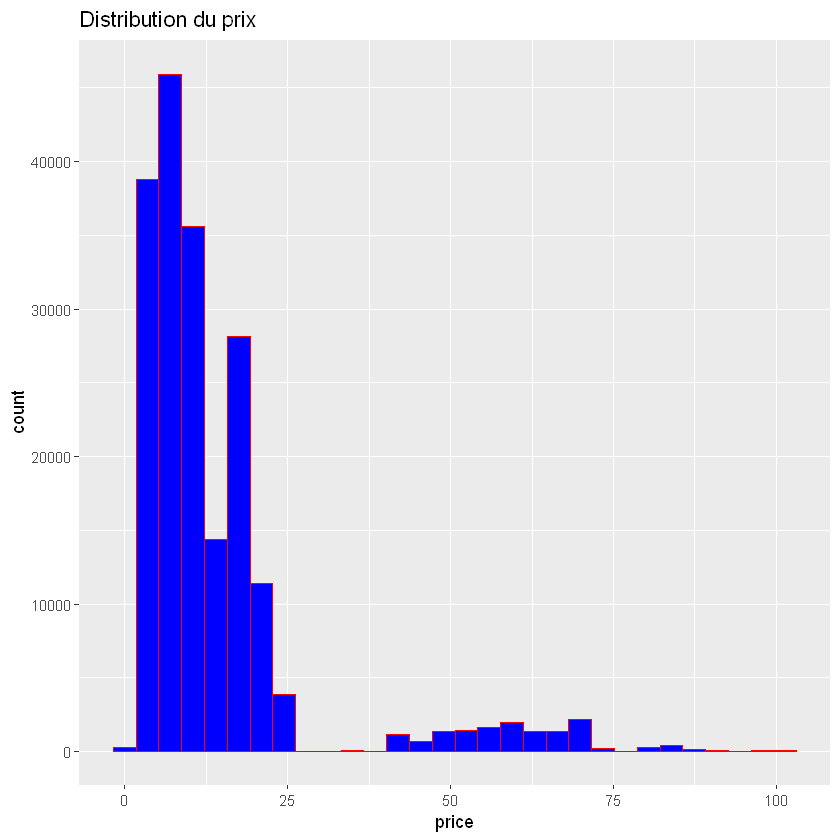

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."

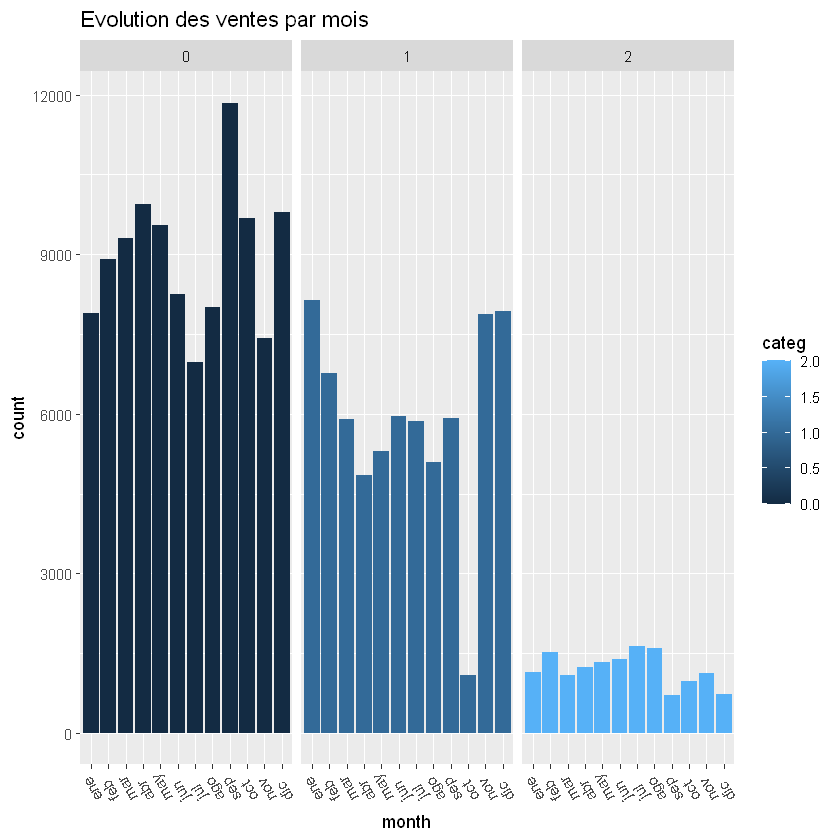

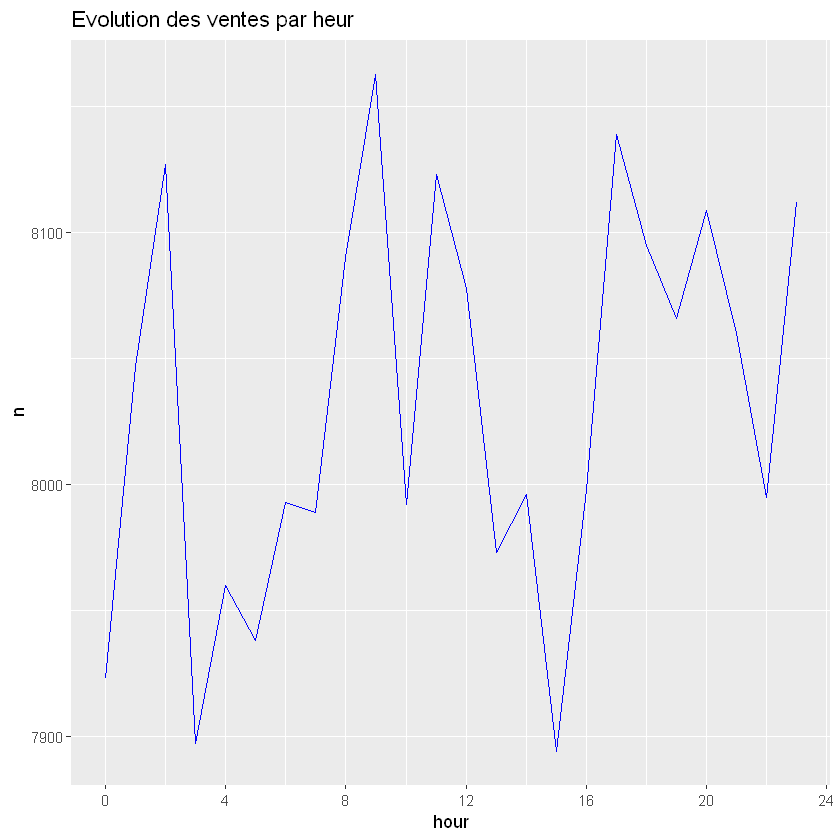

Le taux d'évolution est de : -35 %. Le CA a diminué de 35 % entre septembre et octobre

Warning message:
"Ignoring unknown parameters: shape"

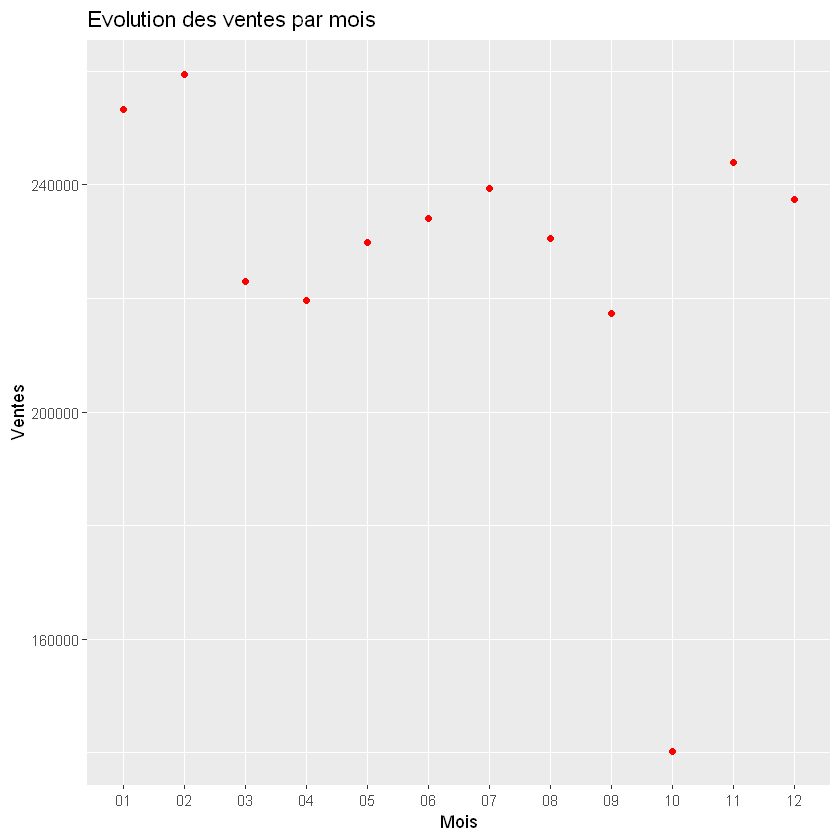

L'indice de Gini est : 0.4333949[1] ""


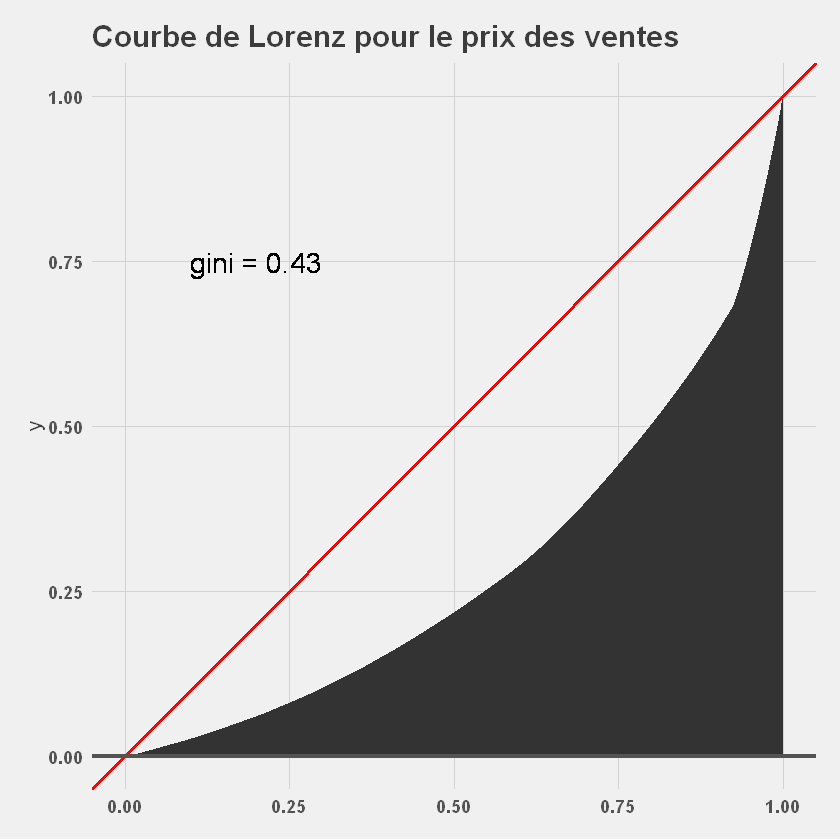

In [3]:
## Analyse de l'âge client

## On va creer une colonne âge
client$age <- 2022 - client$birth

#âge moyenne des clients
cat("L'âge moyen est de :", round(mean(client$age)), 'ans')

# Visualisation de la distribution de l'âge
ggplot(client) +
  geom_histogram(aes(x = age), binwidth=3, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
   ggtitle("Distribution de l'âge")
###############################################################################################################

## Analyse genre des Acheteurs

# visualisation de la répartition client selon sexe
ggplot(client, aes(x=as.factor(sex), fill=as.factor(sex) )) +  
  geom_bar( ) + theme(legend.position="none") +
  ggtitle("Répartition clients selon sexe")+
  xlab("Sexe")+
  ylab("Nombre")+ scale_color_fivethirtyeight() +
  theme_fivethirtyeight()+scale_fill_fivethirtyeight()+
  theme(axis.title = element_text(), axis.title.x = element_blank())+
  theme(legend.position="none") +
  theme(axis.text.x=element_text(size=11,colour="#535353",face="bold")) +
  theme(axis.text.y=element_text(size=11,colour="#535353",face="bold"))+
  theme(axis.text.x=element_text(size=11,colour="#535353",face="bold")) +
  theme(axis.text.y=element_text(size=11,colour="#535353",face="bold")) +
  geom_hline(yintercept=0,size=1.2,colour="#535353")

###################################################################################################################

## Mesure de concentration de l'Age des clients
# Lorenz
dep = client$age
lorenz = cumsum(sort(dep)) / sum(dep)
lorenz = c(0,lorenz) # La courbe de Lorenz commence à 0
n = length(lorenz)
lorenz_df = data.frame(x=((0:(n-1))/n), y=lorenz)

# Graphique Lorenz concentration âge clients
ggplot(lorenz_df, aes(x,y)) + geom_area(shape=1) +
  ggtitle("Courbe de Lorenz pour l'âge des clients") +
  geom_abline(intercept = 0, slope = 1, color = "red", size = 1) +
  geom_text(x=0.2, y=0.75, label="gini = 0.22",size=6)+ scale_color_fivethirtyeight() +
  theme_fivethirtyeight()+scale_fill_fivethirtyeight() +
  theme(axis.title = element_text(), axis.title.x = element_blank()) +
  theme(legend.position="none") +
  theme(axis.text.x=element_text(size=11,colour="#535353",face="bold")) +
  theme(axis.text.y=element_text(size=11,colour="#535353",face="bold")) +
  theme(axis.text.x=element_text(size=11,colour="#535353",face="bold")) +
  theme(axis.text.y=element_text(size=11,colour="#535353",face="bold")) +
  geom_hline(yintercept=0,size=1.2,colour="#535353")

cat("L'indice de Gini est :", ineq(client$age, type = 'Gini'))

print('')

#######################################################################################################################

## Analyses des transactions par catégories

myplot <- ggplot(produit, aes(categ)) + 
          geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") + 
          scale_y_continuous(labels=scales::percent) +
          ylab("Pourcentage") +
          ggtitle("Transactions par Catégories")

myplot

# Comparaison des prix produits par catégories
produit %>% select(categ, price) %>% ggplot(aes(factor(categ), price)) +
                geom_boxplot(color="black", fill="red", alpha=0.5) +
                ggtitle("Répartition prix selon catégorie") +
                theme(axis.text.x = element_text(angle = 90, hjust =1)) + xlab('Catégorie') 

######################################################################################################################

## On va faire une jointure entre les différentes tables

df1 <- merge(client, transaction, by='client_id') #jointure des dataframe client et transaction
df <- merge(df1, produit, by='id_prod') # Jointure avec le dataset product

#######################################################################################################################

## Analyse de la variable 'âge' par apport à la catégorie 

ggplot(df, aes(age, fill = factor(categ))) + 
  geom_bar() + 
  # on include la colonne Age
  facet_grid(~categ) + 
  ggtitle("Variable âge par apport à la catégorie") +
  theme_few() +
  coord_flip() 

#######################################################################################################################

# On va créer une colonne 'age_cat' pour indiquer si la personne est adolescente, adulte ou senior
#df$age_cat[df$age <= 26] <- 'Adolescents'
#df$age_cat[df$age > 26 & df$age <= 60 ] <- 'Adultes'
#df$age_cat[df$age > 60] <- 'Seniors'

df$age_cat[df$age <= 19] <- 'Adolescents'
df$age_cat[df$age > 19 & df$age <= 29 ] <- 'Jeune adultes'
df$age_cat[df$age > 29 & df$age <= 60 ] <- 'Adultes'
df$age_cat[df$age > 60] <- 'Seniors'

# On va visualiser par age_cat
ggplot(df, aes(categ, fill = factor(categ))) + 
  geom_bar() + 
  # on include age_cat
  facet_grid(~age_cat) + 
  ggtitle("Distribution d'Age") +
  theme_few() 
  #coord_flip() 

######################################################################################################################

## Répartition Hommes Femmes selon les catégories

ggplot(df, aes(categ, fill = factor(categ))) + 
  geom_bar() + 
  # on include sex
  facet_grid(~sex) + 
  ggtitle("Répartition Hommes/Femmes selon les catégories") +
  theme_few()

#######################################################################################################################

## Analyse de l'évolution du CA

# Calcule du CA annuel
#cat("Le Chiffre d\'Affaires de Rester livres est de :", round(ca/1e6, 2), "Millions d'Euros (€)")
ca = sum(df$price)
cat("Le Chiffre d\'Affaires de Rester livres est de :", round(ca/1e6, 2), "Millions d'Euros (€)")
print('----------')
# Calcule du CA mensuel
c_a_m = ca / 12
cat('Le Chiffre d\'Affaires mensuel de Rester livres est de :', round(c_a_m, 2), "Euros (€)")

######################################################################################################################

## Chiffre d'affaire en pourcentage par catégorie
chiffre_affaire <- df
ca <- chiffre_affaire %>%
    group_by(categ, price) %>%
    summarise(nb = n()) %>%
    summarize(vente = sum(nb)) %>%
    mutate(pct = round(vente / sum(vente) * 100))


# graphique
#jpeg("pourcentage_ca_categ.jpg", width = 450, height = 350)
barplot(height=ca$pct, names=ca$categ, 
        col="#69b3a2",
        horiz=T, las=1,
        main="Pourcentage du CA par Catégorie",
        xlab="Pourcentage",
        ylab="Catégorie",
        )
#dev.off()

#####################################################################################################################

# on va afficher les differentes informations statistiques
#for(cat in unique(df$categ)){
#    sous = df[df$categ == cat,]
#    print('mean');print(mean(sous$price))
#    print('std');print(sd(sous$price))
#    print('median');print(median(sous$price))
#}

clien_mean <- tapply(df$age, df$sex, mean) # âge moyen client par sexe
ca_client_mean <- tapply(df$age, df$categ, mean) # âge moyen client par catégorie
mean <- tapply(produit$price, produit$categ, mean) # prix moyen par catégorie
sd <- tapply(produit$price, produit$categ, sd) # écart type de prix
median <- tapply(produit$price, produit$categ, median) # médiane de prix

price_mean <- data.frame(mean, sd, median) # on regroupe la moyenne, sd et la médiane
price_mean

########################################################################################################################

## Analyse de la distribution des prix

# Visualisation du prix
ggplot(df) +
  geom_histogram(aes(x = price), fill = "blue", color = "red") +
   ggtitle("Distribution du prix")

cat("Le prix moyen est de :", round(mean(df$price), 2)) 
print('')
cat("L'ecart type est de :", round(sd(df$price), 2))

#######################################################################################################################

## Analyse du comportement des ventes par mois selon les catégories

#df %>%
#  mutate(month = month(date, label = TRUE)) %>%
#  ggplot() +
#  #group_by(month) +
#  facet_grid(~categ) +
#  ggtitle("Evolution des ventes par mois") +
#  geom_bar(aes(x = month), fill = "navy", color = "gold") +
#  theme(axis.text.x = element_text(angle = 90, hjust = 1))

df %>%
  mutate(month = month(date, label = TRUE)) %>%
  ggplot() +
  facet_grid(~categ) +
  ggtitle("Evolution des ventes par mois") +
  geom_bar(aes(x = month, fill = categ)) +
  theme(axis.text.x = element_text(angle = 120, hjust = .1))

# Analyse de vente par heur

df %>%
  mutate(hour = hour(date)) %>%
  group_by(hour) %>%
  tally() %>%
  ggplot() +
  geom_line(aes(x = hour, y = n), color='blue') +
  ggtitle("Evolution des ventes par heur") +
  scale_x_continuous(breaks = seq(0, 24, 4))

####################################################################################################################

## Évolution du CA par mois

# On va creer les colonnes mois, année, heur
df$year <- as.Date(df$date)
df$mois <- format(df$year,"%m")
df$year <- format(df$year,"%Y")
df$hour <- as.POSIXct(df$date)
df$hour <- hour(df$hour)

# On va selectionner les colonnes dont on a besoin
data <- df %>%
  dplyr::select(mois, categ, price)
#head(data, 2)
# On va créer une cross tab pour les ventes par mois
ventes <- xtabs(price ~ mois, data = data)
# On le transforme en dataframe
vent <- data.frame(ventes)

# On fait une jointure entre 
df <- merge(vent, df, by='mois')
# on rénomme la colonne Freq
colnames(df)[2] <- 'Ventes'
#head(df)

# Visualisation
# On va sélectioner les informations necessaires
data <- df
da <- data %>%
    group_by(mois, Ventes, categ) %>%
    tally %>%
    tally
# on fait le graphique
ggplot(da) +
    aes(x = Ventes, y = mois) +
    #color("categ")+
    geom_point(colour = "red") +
    xlab("Ventes") +
    ylab("Mois") +
    ggtitle("Evolution des ventes par mois") +
    coord_flip()

####################################################################################################################

## On va regarder la diminution en % dans le mois d'octobre
# On selectionne les mois d'octobre et de septembre pour pouvoir voir la différence entre les deux mois
octobre <- df[df['mois'] == '10',]
ca_oct <- sum(octobre$price)
septembre <- df[df['mois'] == '09',]
ca_sept <- sum(septembre$price)
taux_evolution_oct <- (ca_oct - ca_sept) / ca_sept
cat("Le taux d'évolution est de :", round(taux_evolution_oct, 2) * 100,"%. Le CA a diminué de 35 % entre septembre et octobre")

##########################################################################################################################

## Mesure de la Concentration du Prix des catégories

# Lorenz
price = df$price
lorenz = cumsum(sort(price)) / sum(price)
lorenz = c(0,lorenz) # La courbe de Lorenz commence à 0
n = length(lorenz)
lorenz_price = data.frame(x=((0:(n-1))/n), y=lorenz)

# Graphique Lorenz concentration age clients
ggplot(lorenz_price, aes(x,y)) + geom_area(shape=1) +
  ggtitle("Courbe de Lorenz pour le prix des ventes") +
  geom_abline(intercept = 0, slope = 1, color = "red", size = 1) +
  geom_text(x=0.2, y=0.75, label="gini = 0.43",size=6) + scale_color_fivethirtyeight() +
  theme_fivethirtyeight()+scale_fill_fivethirtyeight() +
  theme(axis.title = element_text(), axis.title.x = element_blank()) +
  theme(legend.position="none") +
  theme(axis.text.x=element_text(size=11,colour="#535353",face="bold")) +
  theme(axis.text.y=element_text(size=11,colour="#535353",face="bold")) +
  theme(axis.text.x=element_text(size=11,colour="#535353",face="bold")) +
  theme(axis.text.y=element_text(size=11,colour="#535353",face="bold")) +
  geom_hline(yintercept=0,size=1.2,colour="#535353")

cat("L'indice de Gini est :", ineq(df$price, type = 'Gini'))

print('')

**On observe que l'âge moyen est de 44 ans**

**Avec un indice de GINI à 0.22, on peut dire que l'âge des clients est bien réparti**

**C'est la catégorie zéro qui a une plus forte concentration.**

**On peut constater également des valeurs aberrantes qui vont jusqu'au 300 €.**

**On observe une répartition quasi parfaite entre femmes et hommes.**

**On remarque une diminution des ventes de la catégorie 1 pendant ce mois.**

**L'indice de Gini est plus proche de 0. On peut donc considérer que les prix ont tendance à être équitables.**

## <center>Mission III - Corrélation</center>

**Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?**

**Y a-t-il une corrélation entre l'âge des clients et :**

- Le montant total des achats ;
- La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
- La taille du panier moyen (en nombre d’articles) ;
- Les catégories de produits achetés.

,0,1,2,total
f,53282,35647,6839,95768
m,54265,35083,7641,96989
total,107547,70730,14480,192757


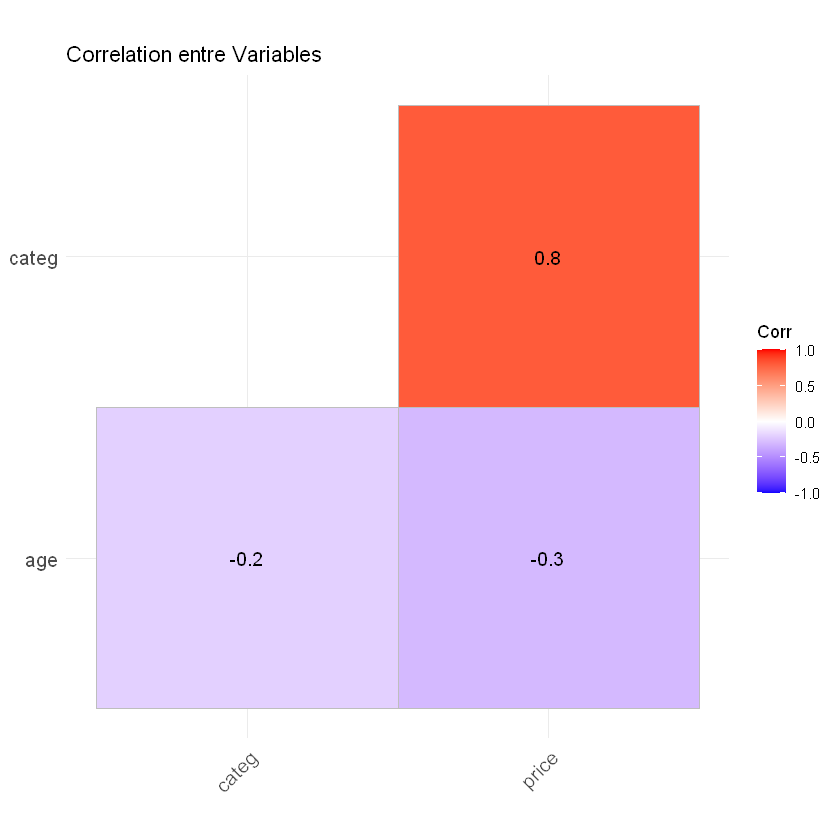


	Pearson's Chi-squared test

data:  c
X-squared = 50.17, df = 2, p-value = 1.276e-11


`geom_smooth()` using formula 'y ~ x'


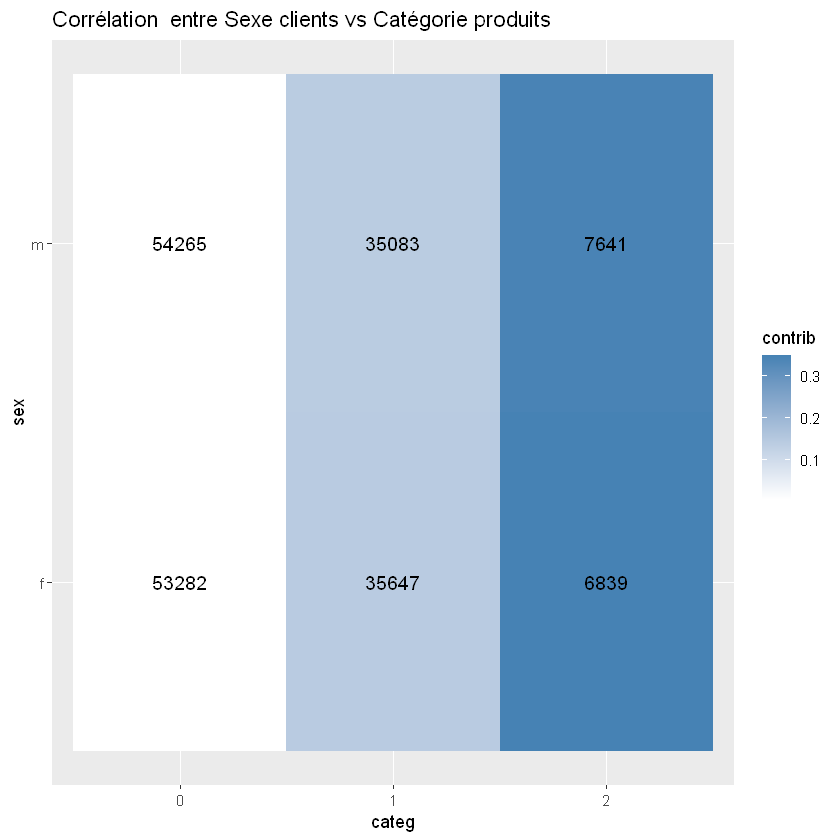


	Pearson's product-moment correlation

data:  df1$age and df1$price
t = -135.58, df = 192755, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2991372 -0.2909862
sample estimates:
       cor 
-0.2950671 


`geom_smooth()` using formula 'y ~ x'


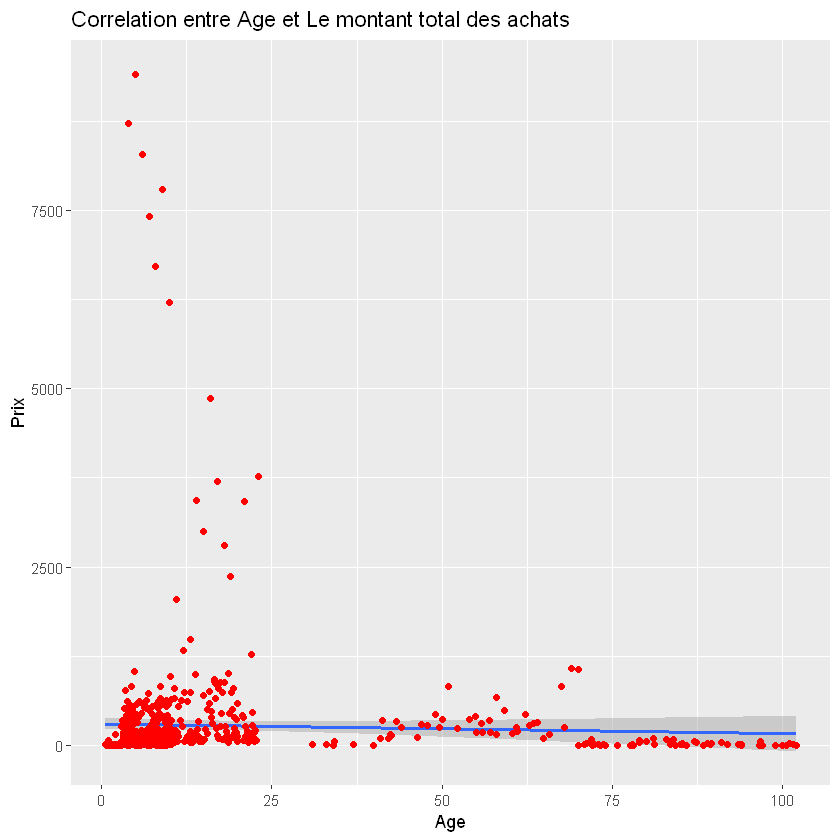


	Pearson's product-moment correlation

data:  freq_achat$Group.2 and freq_achat$x
t = -20.208, df = 906, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6006679 -0.5108569
sample estimates:
       cor 
-0.5573909 


`geom_smooth()` using formula 'y ~ x'


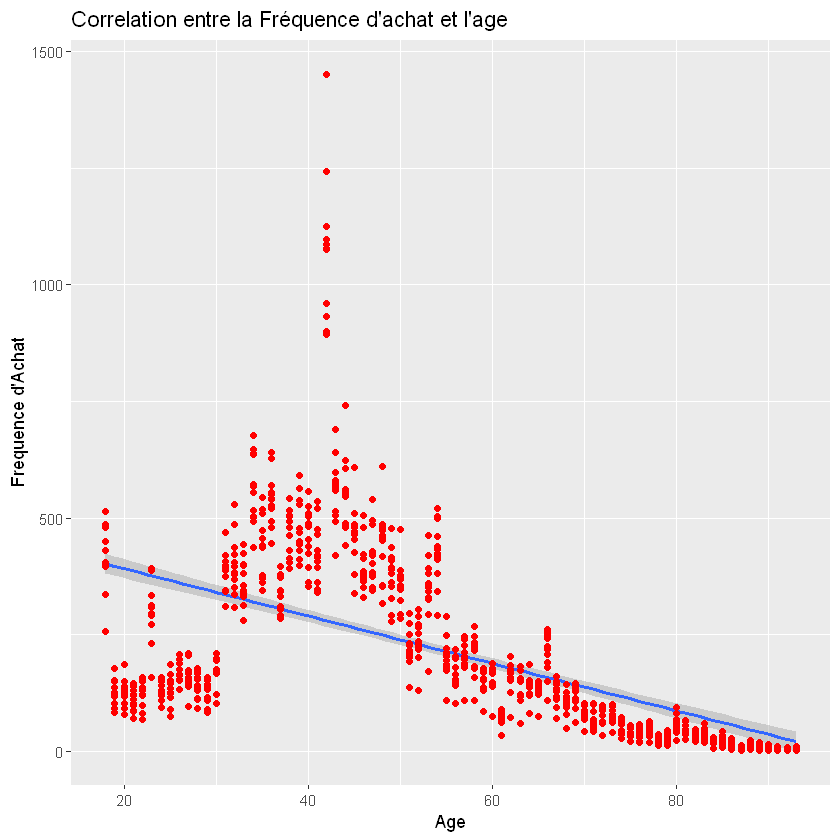


	Pearson's product-moment correlation

data:  panier_moyen$Group.1 and panier_moyen$x
t = -6.0147, df = 74, p-value = 6.324e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7071210 -0.3991262
sample estimates:
       cor 
-0.5730186 


,0,1,2,total
Adolescents,1113,2316,3106,6535
Adultes,94229,47663,1878,143770
Jeune adultes,2806,6247,9209,18262
Seniors,9399,14504,287,24190
total,107547,70730,14480,192757


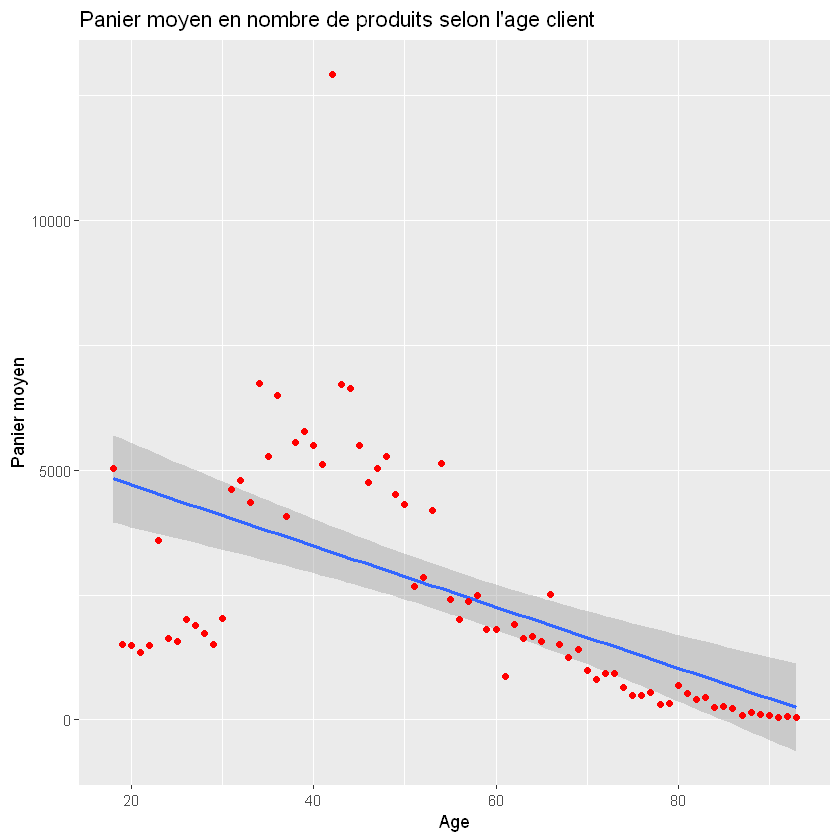

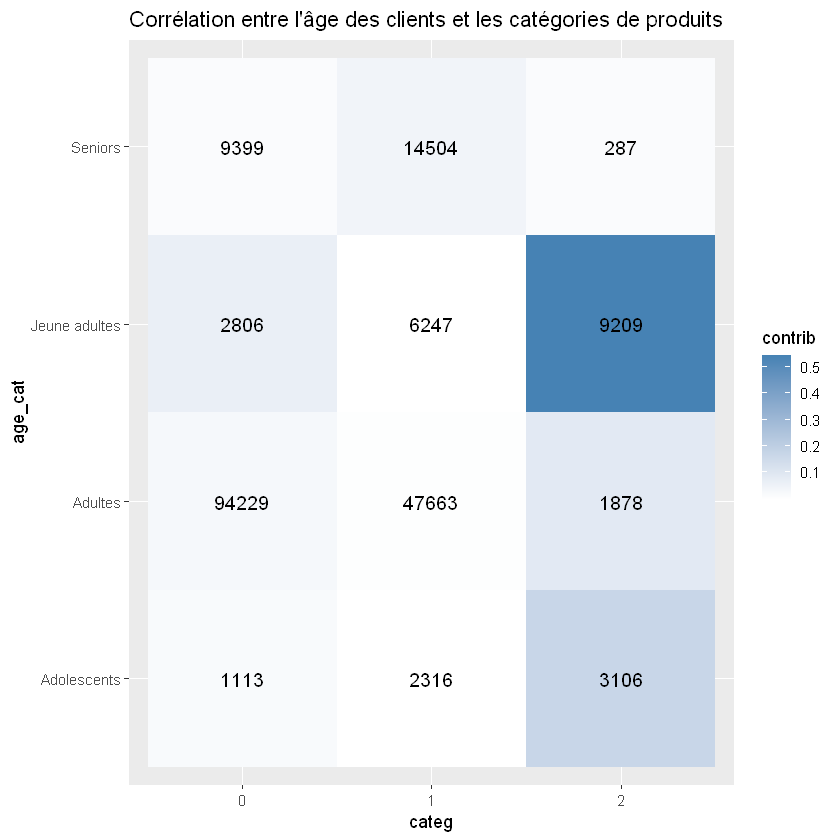

In [4]:
## On va sélectionner les colonnes dont on a besoin

df1 <- df %>%
    dplyr::select(categ, price, age)

#head(df1)

## corrélation entre les différentes variables

corr <- round(cor(df1), 1)
ggcorrplot(corr, hc.order = TRUE, type = "lower", lab = TRUE) +
    ggtitle('Correlation entre Variables')

#######################################################################################################################

## 1 - Corrélation entre sexe et catégorie
X = "sex"
Y = "categ"

c = as.data.frame.matrix(table(df[,c(X,Y)]))
cont = c

tx = rowSums(cont)
ty = colSums(cont)

cont[,"total"] = tx
cont["total",(1:(ncol(cont)-1))] = ty
cont["total","total"] = nrow(df)
cont

indep = tx %*% t(ty) / nrow(df)

mesure = (c-indep)^2/indep
xi_n = sum(mesure)

contributions = mesure/xi_n

cont_reshaped = as.data.frame(table(data[,c(X,Y)]))
cont_reshaped["contrib"] = NA
for(i in 1:nrow(cont_reshaped)){
    x = cont_reshaped[i,X]
    y = cont_reshaped[i,Y]
    cont_reshaped[i,"contrib"] = contributions[x,y]
}
ggplot(cont_reshaped, aes_string(X,Y)) +    
    geom_tile(aes(fill = contrib)) +
    geom_text(aes(label=Freq), size=4) +
    ggtitle("Corrélation  entre Sexe clients vs Catégorie produits") +
    scale_fill_gradient(low = "white", high = "steelblue") +
    coord_flip()

###### chitest
chisq.test(c)
    
############################################################################################################

### 2 - Corrélation entre âge et Le montant total des achats 
#ggplot(df1) +
#    aes(x = age, y = price) +
#    geom_smooth(method = "lm") +
#    geom_point(colour = "red") +
#    ggtitle('Correlation entre Age et Prix') +
#    xlab("% d'age") +
#    ylab("% des Prix")

age_prix <- df %>% select(age ,price)
age_prix <- aggregate(age_prix$age, by=list(age_prix$price), FUN=length)

ggplot(age_prix) +
    aes(x = Group.1, y = x) +
    geom_smooth(method = "lm") +
    geom_point(colour = "red") +
    ggtitle('Correlation entre Age et Le montant total des achats ') +
    xlab("Age") +
    ylab("Prix")

# Test de Pearson entre âge et prix
coef_p <- cor.test(df1$age, df1$price)
coef_p

#################################################################################################################

## 3 - corrélation entre la fréquence d'achat et l'âge client

freq_achat <- df %>% select(mois, session_id, age)
freq_achat <- aggregate(freq_achat$session_id, by=list(freq_achat$mois,freq_achat$age), FUN=length)

# graphique corrélation freq achat et âge
ggplot(freq_achat) +
    aes(x = Group.2, y = x) +
    geom_smooth(method = "lm") +
    geom_point(colour = "red") +
    ggtitle("Correlation entre la Fréquence d'achat et l'age") +
    xlab("Age") +
    ylab("Frequence d'Achat")

# Test de Pearson entre âge et prix
coef_p <- cor.test(freq_achat$Group.2, freq_achat$x)
coef_p

################################################################

## Analyse de la corrélation entre l'âge clients et la taille du panier moyen

panier_moyen <- df %>% select(age, id_prod)
panier_moyen <- aggregate(panier_moyen$id_prod, by=list(panier_moyen$age), FUN=length)

## graphique panier moyen

ggplot(panier_moyen) +
    aes(x = Group.1, y = x) +
    geom_smooth(method = "lm") +
    geom_point(colour = "red") +
    ggtitle('Panier moyen en nombre de produits selon l\'age client') +
    xlab("Age") +
    ylab("Panier moyen")

# test de Pearson
coef_p <- cor.test(panier_moyen$Group.1, panier_moyen$x)
coef_p

################################################################################################################

## Analyses de la corrélation entre âge et le montant du panier
X = "age_cat"
Y = "categ"

c = as.data.frame.matrix(table(df[,c(X,Y)]))
cont = c

tx = rowSums(cont)
ty = colSums(cont)

cont[,"total"] = tx
cont["total",(1:(ncol(cont)-1))] = ty
cont["total","total"] = nrow(df)
cont

indep = tx %*% t(ty) / nrow(df)

mesure = (c-indep)^2/indep
xi_n = sum(mesure)

contributions = mesure/xi_n

cont_reshaped = as.data.frame(table(data[,c(X,Y)]))
cont_reshaped["contrib"] = NA
for(i in 1:nrow(cont_reshaped)){
    x = cont_reshaped[i,X]
    y = cont_reshaped[i,Y]
    cont_reshaped[i,"contrib"] = contributions[x,y]
}
ggplot(cont_reshaped, aes_string(X,Y)) +    
    geom_tile(aes(fill = contrib)) +
    geom_text(aes(label=Freq), size=4) +
    ggtitle("Corrélation entre l'âge des clients et les catégories de produits") +
    scale_fill_gradient(low = "white", high = "steelblue") +
    coord_flip()

#################################################################################################################



**On remarque une corrélation positive entre prix et catégorie et une corrélation négative avec l'âge.**

**L'indice élevé du Chi2 démontre une importance significative entre les occurences théoriques et celles du tableau de contigence.
La comparaison de p-value avec notre seuil de significativité (traditionnellement 5%) expose une valeur inférieure au seuil. 
L'hypothèse nulle est rejetée en faveur de l’hypothèse alternative, il existe un lien entre le sexe des clients et les catégories produits.**

***On observe une corrélation négative entre l'âge des clients et le montant total des achats. Plus l'âge augmente, moins le montant est elevé.***

**On observe une corrélation entre les deux variables.**

- **Par exemple plus les personnes sont jeunes plus la fréquence d'achat est élevée.**

**Il y a une corrélation entre les produits achetés et l'âge des clients.**

**On peut observer que la catégorie 2 est plus achetée par les jeunes adultes.**